# NYC Measles Cases by Age (2018-2019)

* This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC Measles Cases by Age.
* This notebook is part of the [Visualizing the 2019 Measles Outbreak](https://carlos-afonso.github.io/measles/) GitHub project, under [MIT License](https://github.com/carlos-afonso/measles/blob/master/LICENSE).
* [Carlos Afonso](https://www.linkedin.com/in/carlos-afonso-w/), July 29, 2019

## Import Libraries

In [1]:
# Import the necessary libraries/modules
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

## Import Data

The data has been manually collected from the [NYC Health Measles webpage](https://www1.nyc.gov/site/doh/health/health-topics/measles.page), and saved as a [CSV file](https://github.com/carlos-afonso/measles/blob/master/data/nyc_health_measles_cases_by_age.csv).

In [2]:
# Set (relative) path to CSV data file
data_file = '../data/nyc_health_measles_cases_by_age.csv'

# Import data from CSV file as a pandas dataframe
df = pd.read_csv(data_file)

## Check Data

Check the data we just imported.

In [3]:
# Show basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
Start Date           8 non-null object
End Date             8 non-null object
Under 1 year         8 non-null int64
1 to 4 years         8 non-null int64
5 to 17 years        8 non-null int64
18 years and over    8 non-null int64
Total                8 non-null int64
dtypes: int64(5), object(2)
memory usage: 528.0+ bytes


In [4]:
# Show all the data
df

,Start Date,End Date,Under 1 year,1 to 4 years,5 to 17 years,18 years and over,Total
0,2018-09-01,2019-05-20,83,227,113,100,523
1,2018-09-01,2019-05-24,85,229,115,106,535
2,2018-09-01,2019-05-29,87,237,119,107,550
3,2018-09-01,2019-06-03,89,245,120,112,566
4,2018-09-01,2019-06-10,91,252,125,120,588
5,2018-09-01,2019-06-24,95,261,129,124,609
6,2018-09-01,2019-07-15,97,267,132,127,623
7,2018-09-01,2019-07-22,97,273,138,129,637


## Extract Data

Extract and transform the data necessary to create the bar chart.

Note that each row in the dataframe is a data update. We want the latest data update which is the last row in the dataframe.

In [5]:
# Show the latest data (last row in the dataframe)
df.tail(1)

,Start Date,End Date,Under 1 year,1 to 4 years,5 to 17 years,18 years and over,Total
7,2018-09-01,2019-07-22,97,273,138,129,637


We want to show the start and end dates in the plot, to provide context. So, let's extract these two dates from the dataframe (last row, first two columns) and transform them into nicelly formatted strings.

In [6]:
# Notes about the lambda function below:
# - 1. The strptime operation transforms the raw date string to a datetime object;
# - 2. The strftime operation transforms the datetime object to a nicelly formatted date string;
# - 3. The replace operation removes any leading zeros.
[start_date, end_date] = map(
    lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%b %d, %Y').replace(' 0', ' '),
    df.iloc[-1, :2]
)

# Show the nicelly formated date strings
[start_date, end_date]

['Sep 1, 2018', 'Jul 22, 2019']

We also want to show the total number of cases in the plot, to provide context.

In [7]:
# Get the number of total cases (last row, last column)
total_cases = df.iloc[-1, -1]
total_cases

637

Finally, lets extract the data to actually plot (last row, second to penultimate columns).

In [8]:
# Extract the data to plot (last row, second to penultimate columns)
# Call it 'd2p' as an abbrevation for 'data to plot'
d2p = df.iloc[-1, 2:-1]
d2p

Under 1 year          97
1 to 4 years         273
5 to 17 years        138
18 years and over    129
Name: 7, dtype: object

## Create Bar Chart

We create a bar chart that provides the necessary context:

* the title says exactely what it is;
* the sub-title showns the start and end dates, and the total number of cases during that period;
* a text annotation at the bottom provides information about the data and image sources;

Also, we make the bar chart as clear as possible:

* use an horizontal bar chart because it is  easier to read than a vertical one;
* explicitly show the number and percentage of cases for each age group;
* use a large enough font to make all labels easy to read;
* remove unnecessary elements: x-axis ticks and values, y-axis ticks, and plot box.

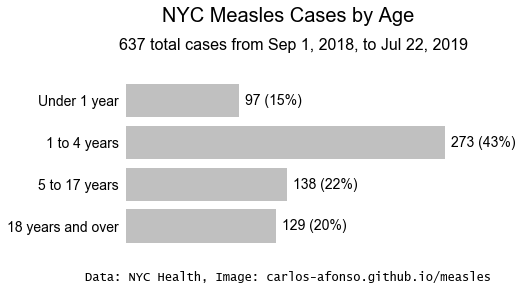

In [9]:
# Define font parameters
fn = 'Arial' # font name
fsb = 14     # font size base

# Create figure
fig = plt.figure()

# Add "figure title"
fig.suptitle('NYC Measles Cases by Age', fontname=fn, fontsize=(fsb + 6))

# Add space between the "figure title" and the plot to create space for the "plot title".
# If we don't add this space the "figure title" and the "plot title" will overlap. 
fig.subplots_adjust(top = 0.75)

# Add "plot title" which we will be using as the "figure sub-title"
subtitle = str(total_cases) + ' total cases from ' + start_date + ', to ' + end_date + '\n'
plt.title(subtitle, fontname=fn, fontsize=(fsb + 2))

# Create the horizontal bar plot
ax = d2p.plot.barh(width=0.8, color='silver')

# Invert the y-axis
ax.invert_yaxis()

# Remove the x-axis ticks and values
ax.get_xaxis().set_ticks([])

# Remove the y-axis ticks only (keeps the labels)
ax.yaxis.set_ticks_position('none')

# Set the y-axis labels font properties
ax.set_yticklabels(d2p.keys(), fontname=fn, fontsize=fsb)

# Create labels in front of the bars showing the number and percentage of cases.
# Note: we round the percentages to the closest integer.
for i in ax.patches:
    label = str(i.get_width()) + " (" + str(int(round(100 * i.get_width() / total_cases))) + "%)"
    ax.text(i.get_width() + 5, i.get_y() + 0.5, label, fontname=fn, fontsize=fsb)

# Remove the axes box
plt.box(False)

# Add text about the Data/Image sources
sources = 'Data: NYC Health, Image: carlos-afonso.github.io/measles'
fig.text(0.5, 0.03, sources, fontname='Lucida Console', fontsize=(fsb - 2), horizontalalignment='center')

# Show figure
plt.show()

## Save Bar Chart

In [10]:
# Set image file path/name (without file extension)
img_file = '../images/nyc-measles-cases-by-age-bar-chart-py'

# Save as PNG image
fig.savefig(img_file + '.png', bbox_inches='tight', dpi=200)

# Save as SVG image
fig.savefig(img_file + '.svg', bbox_inches='tight')

## Export Notebook as HTML

In [12]:
os.system('jupyter nbconvert --to html nyc-measles-cases-by-age.ipynb')

0